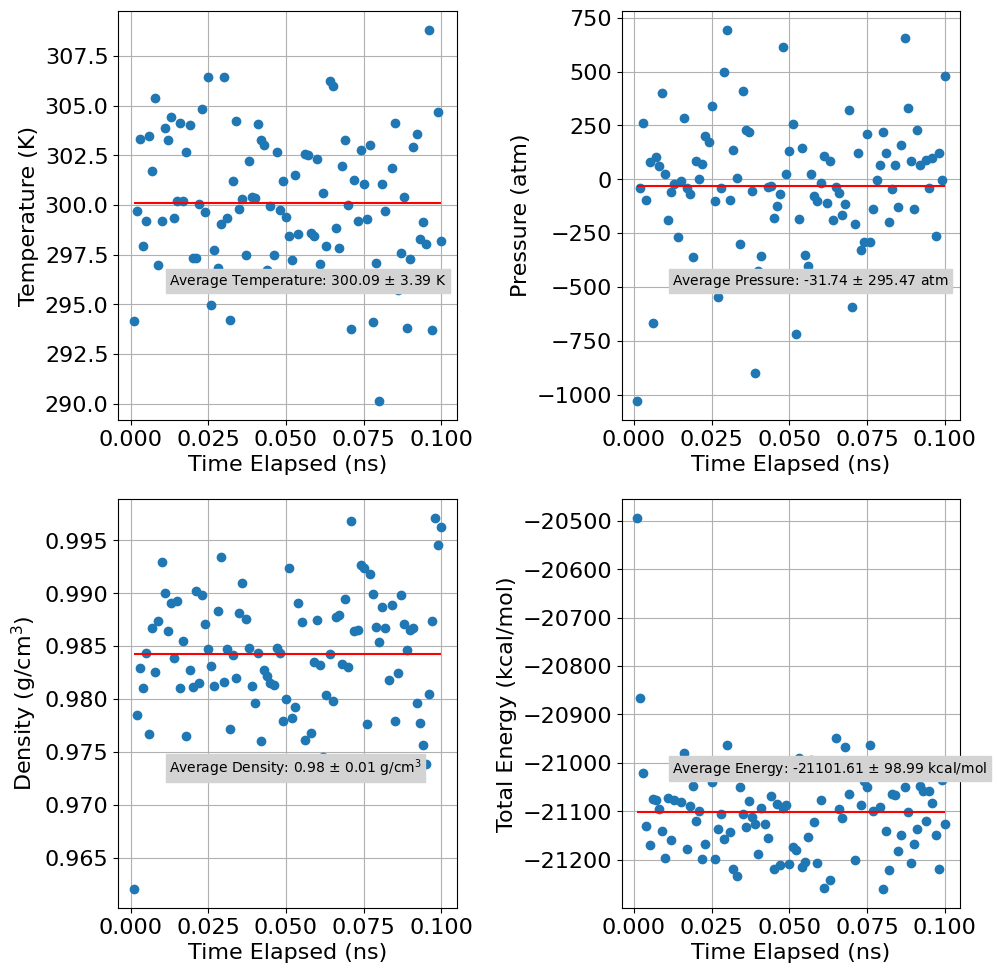

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

file = './out/simulation.log'
data=[]
runFlag=False

fig,axes=plt.subplots(2,2,figsize=(10,10))
axes=axes.flatten()

with open(file) as f:
    while True:
        line = f.readline()
        if line.split(' ')[0] == 'run':
            runFlag=True
        if (line.split(' ')[0] == 'Per') and runFlag:
            header = f.readline().split()
            while True:
                line2 = f.readline()
                try: 
                    float(line2.split()[0])
                except:
                    break
                else:
                    data.append([float(entry) for entry in line2.split()])
        
        if not line:
                break

df = pd.DataFrame(data, columns=header).iloc[1:]
df['Time'] = df['Step'] / 1e6
df.plot('Time','Temp',ax=axes[0],legend=False,ylabel='Temperature (K)', xlabel='Time Elapsed (ns)',ls='None',marker='o')
df.plot('Time','Press',ax=axes[1],legend=False,ylabel='Pressure (atm)', xlabel='Time Elapsed (ns)',ls='None',marker='o')
df.plot('Time','Density',ax=axes[2],legend=False,ylabel=r'Density (g/cm$^3$)', xlabel='Time Elapsed (ns)',ls='None',marker='o')
df.plot('Time','TotEng',ax=axes[3],legend=False,ylabel=r'Total Energy (kcal/mol)', xlabel='Time Elapsed (ns)',ls='None',marker='o')

fig.tight_layout()
mean_df = df.mean()
std_df = df.std()

for k,l,m,n in zip([0,1,2,3],['Temp','Press','Density','TotEng'],['K', 'atm', r'g/cm$^3$', 'kcal/mol'],['Temperature','Pressure', 'Density', 'Energy']):
        
    axes[k].annotate(r'Average {3}: {0:.2f} $\pm$ {1:.2f} {2}'.format(mean_df[l],std_df[l],m,n),xy=(0.15,0.33),xycoords='axes fraction',backgroundcolor="lightgray",fontsize=10)
    axes[k].hlines(y=mean_df[l],xmin=df['Time'].iloc[0],xmax=df['Time'].iloc[-1], color='r')
    axes[k].grid()

[[0.0, 300.0, 18625.571, 0.99701995, -5257.8549], [1000.0, 294.13824, -1030.0321, 0.96202609, -20493.452], [2000.0, 299.69027, -42.575086, 0.97851764, -20866.882], [3000.0, 303.30994, 262.00829, 0.98289017, -21020.697], [4000.0, 297.93551, -94.247844, 0.98101858, -21130.368], [5000.0, 299.17943, 81.187978, 0.98437625, -21170.549], [6000.0, 303.47107, -668.6227, 0.97673303, -21074.035], [7000.0, 301.71619, 101.4283, 0.98675042, -21076.777], [8000.0, 305.38393, 59.121908, 0.98257503, -21094.688], [9000.0, 296.95174, 398.24937, 0.98736881, -21141.107], [10000.0, 299.20413, 25.260268, 0.99293547, -21196.147], [11000.0, 303.87343, -189.983, 0.99004547, -21073.286], [12000.0, 303.28626, -57.430766, 0.98642248, -21158.682], [13000.0, 304.40238, -20.837739, 0.98906461, -21076.723], [14000.0, 299.31808, -268.52138, 0.98386531, -21006.524], [15000.0, 300.21546, -7.8771218, 0.98924335, -21081.001], [16000.0, 304.1409, 283.6737, 0.98101983, -20979.352], [17000.0, 300.17366, -42.603828, 0.9854946, 